# Steam Games EDA

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Import, read and save datasets to dataframes
games_df = pd.read_csv('games.csv', dtype={'app_id': 'int32', 'rating': 'category'})
recommendations_df = pd.read_csv('recommendations.csv', dtype={'app_id': 'int32', 'user_id': 'int32'})
users_df = pd.read_csv('users.csv', dtype={'user_id': 'int32', 'products': 'int32'})

# Dataset Exploration

#### Games Dataset

In [4]:
games_df.head()
games_df.info()
games_df.describe(include='object')
games_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   app_id          50872 non-null  int32   
 1   title           50872 non-null  object  
 2   date_release    50872 non-null  object  
 3   win             50872 non-null  bool    
 4   mac             50872 non-null  bool    
 5   linux           50872 non-null  bool    
 6   rating          50872 non-null  category
 7   positive_ratio  50872 non-null  int64   
 8   user_reviews    50872 non-null  int64   
 9   price_final     50872 non-null  float64 
 10  price_original  50872 non-null  float64 
 11  discount        50872 non-null  float64 
 12  steam_deck      50872 non-null  bool    
dtypes: bool(4), category(1), float64(3), int32(1), int64(2), object(2)
memory usage: 3.2+ MB


app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

#### Recommendations Dataset

In [5]:
recommendations_df.head()
recommendations_df.info()
recommendations_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int32  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int32  
 7   review_id       int64  
dtypes: bool(1), float64(1), int32(2), int64(3), object(1)
memory usage: 1.9+ GB


app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

#### Users Dataset

In [6]:
users_df.head()
users_df.info()
users_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   products  int32
 2   reviews   int64
dtypes: int32(2), int64(1)
memory usage: 218.3 MB


user_id     0
products    0
reviews     0
dtype: int64

# Data Cleaning and Transformations

### Clean and prepare the games dataset

In [7]:
games_df = (
    games_df.drop(columns="steam_deck", errors="ignore")
    .drop_duplicates()
    .assign(
        release_year=lambda x: pd.to_datetime(x['date_release'], errors = 'coerce').dt.year,
        release_month=lambda x: pd.to_datetime(x['date_release'], errors = 'coerce').dt.month,
        rating=lambda x: x['rating'].replace({
            'Overwhelmingly Positive': 'Very Positive',
            'Very Positive': 'Very Positive',
            'Mostly Positive': 'Positive',
            'Mixed': 'Neutral',
            'Mostly Negative': 'Negative',
            'Very Negative': 'Very Negative',
            'Overwhelmingly Negative': 'Very Negative'
        })
    )
)

games_df = games_df.drop(columns=['date_release'])

In [8]:
#View cleaned games dataframe
games_df.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,release_year,release_month
0,13500,Prince of Persia: Warrior Within™,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,2008,11
1,22364,BRINK: Agents of Change,True,False,False,Positive,85,21,2.99,2.99,0.0,2011,8
2,113020,Monaco: What's Yours Is Mine,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,2013,4
3,226560,Escape Dead Island,True,False,False,Neutral,61,873,14.99,14.99,0.0,2014,11
4,249050,Dungeon of the ENDLESS™,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,2014,10


In [9]:
# Clean and prepare the users dataset
users_df = users_df.drop_duplicates()
users_df.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [10]:
# Clean and prepare the recommendations dataset
recommendations_df = (
    recommendations_df.drop(columns="review_id", errors="ignore")
    .drop_duplicates()
    .assign(
        rec_year=lambda x: pd.to_datetime(x['date'], errors = 'coerce').dt.year,
        rec_month=lambda x: pd.to_datetime(x['date'], errors = 'coerce').dt.month
    )
)

In [11]:
recommendations_df = recommendations_df.drop(columns= ['date'])

In [12]:
recommendations_df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,rec_year,rec_month
0,975370,0,0,True,36.3,51580,2022,12
1,304390,4,0,False,11.5,2586,2017,2
2,1085660,2,0,True,336.5,253880,2019,11
3,703080,0,0,True,27.4,259432,2022,9
4,526870,0,0,True,7.9,23869,2021,1


In [13]:
#Rename columns for clarity.
games_df = games_df.rename(columns={'user_reviews': 'game_reviews'})
users_df = users_df.rename(columns={'reviews': 'user_reviews'})

## Save cleaned datasets

In [14]:
games_df.to_csv('cleaned_games.csv', index=False)

In [15]:
users_df.to_csv('cleaned_users.csv', index=False)

In [16]:
recommendations_df.to_csv('cleaned_recommendations.csv', index=False)

# Exploratory Data Analysis

### Games Dataset

In [17]:
games_df.describe()

,app_id,positive_ratio,game_reviews,price_final,price_original,discount,release_year,release_month
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212,2018.691697,6.562018
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679,3.100610,3.418260
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000,1997.000000,1.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000,2017.000000,4.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000,2019.000000,7.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000,2021.000000,10.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000,2023.000000,12.000000


### Rating Distribution Histogram

In [18]:
games_df['rating'].value_counts()

rating
Positive         22240
Very Positive    14249
Neutral          12157
Negative          2152
Very Negative       74
Name: count, dtype: int64

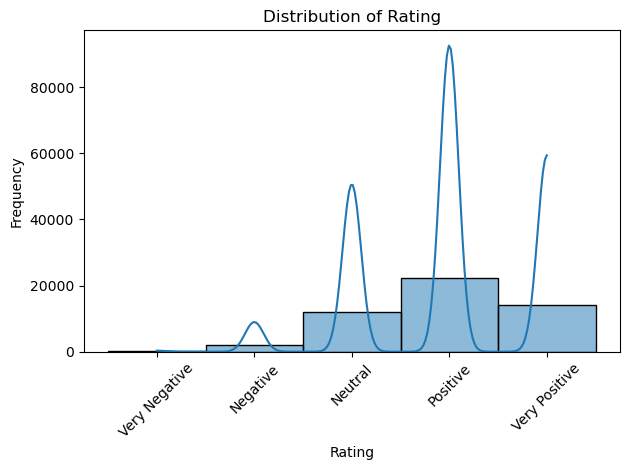

In [19]:
# Define the ordered categories
rating_order = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

# Convert the 'rating' column to an ordered categorical type
games_df['rating'] = pd.Categorical(games_df['rating'], categories=rating_order, ordered=True)

sns.histplot(games_df['rating'], kde=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Adjust the layout to make sure labels fit
plt.tight_layout()
plt.show()


## Recommendations Dataset

In [20]:
recommendations_df.describe()

,app_id,helpful,funny,hours,user_id,rec_year,rec_month
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.019574e+03,7.012002e+00
std,4.729233e+05,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,2.335517e+00,3.574875e+00
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,1.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,2.018000e+03,4.000000e+00
50%,4.351500e+05,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.020000e+03,7.000000e+00
75%,9.331100e+05,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,2.021000e+03,1.100000e+01
max,2.253290e+06,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,2.022000e+03,1.200000e+01


## Users Dataset

In [21]:
users_df.describe()

,user_id,products,user_reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


# Merge recommendations_df and users_df

In [22]:
# Merge the datasets on 'user_id' (assuming 'user_id' is the common column)
merged_df = pd.merge(recommendations_df, users_df, on='user_id', how='inner')

In [23]:
# Select numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns
numerical_data = merged_df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                app_id   helpful     funny     hours   user_id  rec_year  \
app_id        1.000000  0.001828 -0.003073 -0.127067 -0.026900  0.479490   
helpful       0.001828  1.000000  0.480360  0.007746  0.004612 -0.016406   
funny        -0.003073  0.480360  1.000000  0.006393  0.001642 -0.013304   
hours        -0.127067  0.007746  0.006393  1.000000  0.005504 -0.025786   
user_id      -0.026900  0.004612  0.001642  0.005504  1.000000 -0.076155   
rec_year      0.479490 -0.016406 -0.013304 -0.025786 -0.076155  1.000000   
rec_month     0.088512 -0.002065 -0.003021  0.000422 -0.008976 -0.045652   
products     -0.022788  0.031059  0.008313 -0.079085  0.058460 -0.151231   
user_reviews -0.004542  0.007880  0.000323 -0.061338  0.022603 -0.032921   

              rec_month  products  user_reviews  
app_id         0.088512 -0.022788     -0.004542  
helpful       -0.002065  0.031059      0.007880  
funny         -0.003021  0.008313      0.000323  
hours          0.000422 -0.079085     -

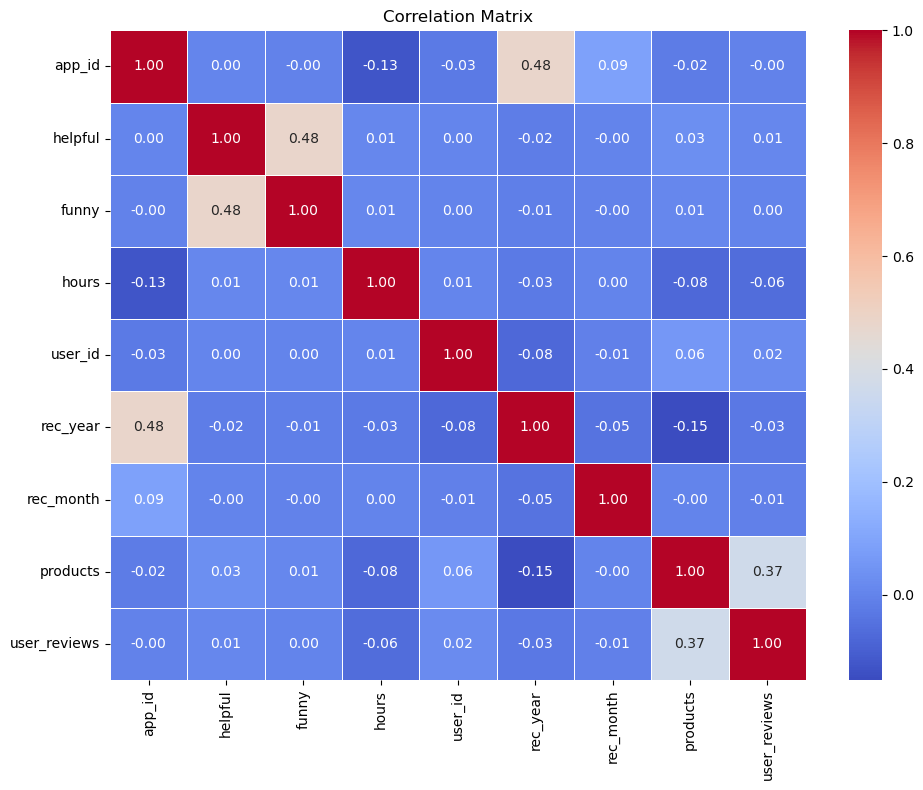

In [24]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


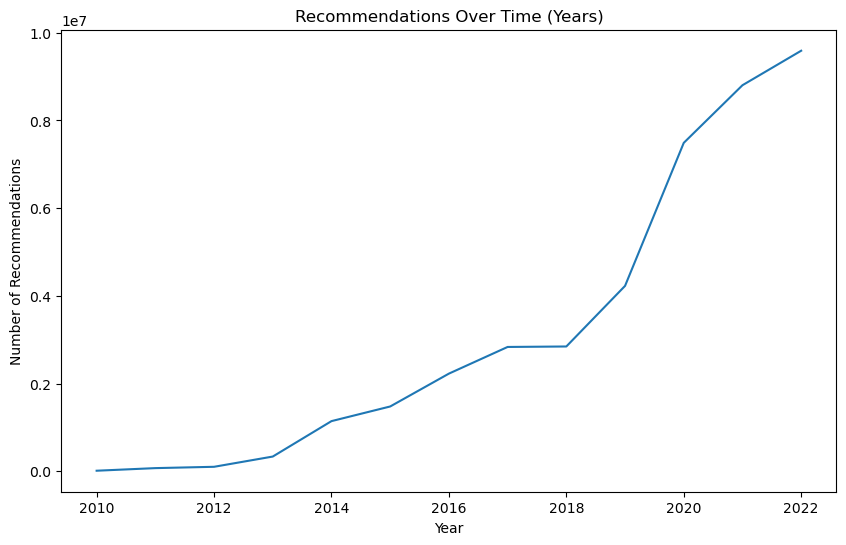

In [25]:
# Plot number of recommendations per year
recommendations_per_year = merged_df.groupby('rec_year').size()
recommendations_per_year.plot(kind='line', figsize=(10, 6))
plt.title("Recommendations Over Time (Years)")
plt.xlabel("Year")
plt.ylabel("Number of Recommendations")
plt.show()


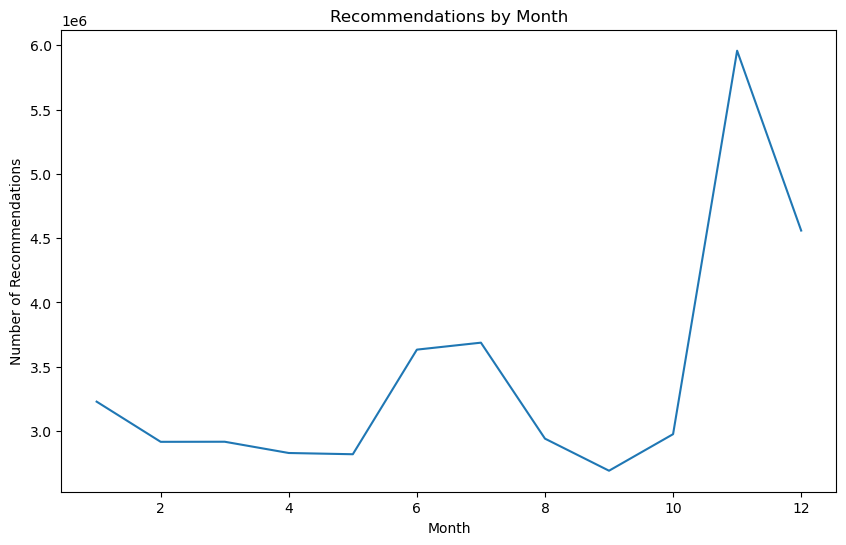

In [26]:
# Plot recommendations per month
recommendations_per_month = merged_df.groupby('rec_month').size()
recommendations_per_month.plot(kind='line', figsize=(10, 6))
plt.title("Recommendations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Recommendations")
plt.show()


# Merge all datasets together to allow for further analyses

In [27]:
# Merge merged_df with games_df on 'app_id'
merged_with_games = pd.merge(merged_df, games_df, on='app_id', how='inner')  # 'inner' join by default

In [28]:
# Inspect the merged dataset
merged_with_games.info()
merged_with_games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 22 columns):
 #   Column          Dtype   
---  ------          -----   
 0   app_id          int32   
 1   helpful         int64   
 2   funny           int64   
 3   is_recommended  bool    
 4   hours           float64 
 5   user_id         int32   
 6   rec_year        int32   
 7   rec_month       int32   
 8   products        int32   
 9   user_reviews    int64   
 10  title           object  
 11  win             bool    
 12  mac             bool    
 13  linux           bool    
 14  rating          category
 15  positive_ratio  int64   
 16  game_reviews    int64   
 17  price_final     float64 
 18  price_original  float64 
 19  discount        float64 
 20  release_year    int32   
 21  release_month   int32   
dtypes: bool(4), category(1), float64(4), int32(7), int64(5), object(1)
memory usage: 4.3+ GB


,app_id,helpful,funny,is_recommended,hours,user_id,rec_year,rec_month,products,user_reviews,...,mac,linux,rating,positive_ratio,game_reviews,price_final,price_original,discount,release_year,release_month
0,975370,0,0,True,36.3,51580,2022,12,28,5,...,False,False,Very Positive,95,19665,30.0,0.0,0.0,2022,12
1,975370,2,0,True,58.7,12035356,2022,12,140,10,...,False,False,Very Positive,95,19665,30.0,0.0,0.0,2022,12
2,975370,0,0,True,12.3,12104501,2022,12,141,6,...,False,False,Very Positive,95,19665,30.0,0.0,0.0,2022,12
3,975370,0,0,True,24.3,12159611,2022,12,119,3,...,False,False,Very Positive,95,19665,30.0,0.0,0.0,2022,12
4,975370,0,0,True,7.4,6479577,2022,12,513,12,...,False,False,Very Positive,95,19665,30.0,0.0,0.0,2022,12


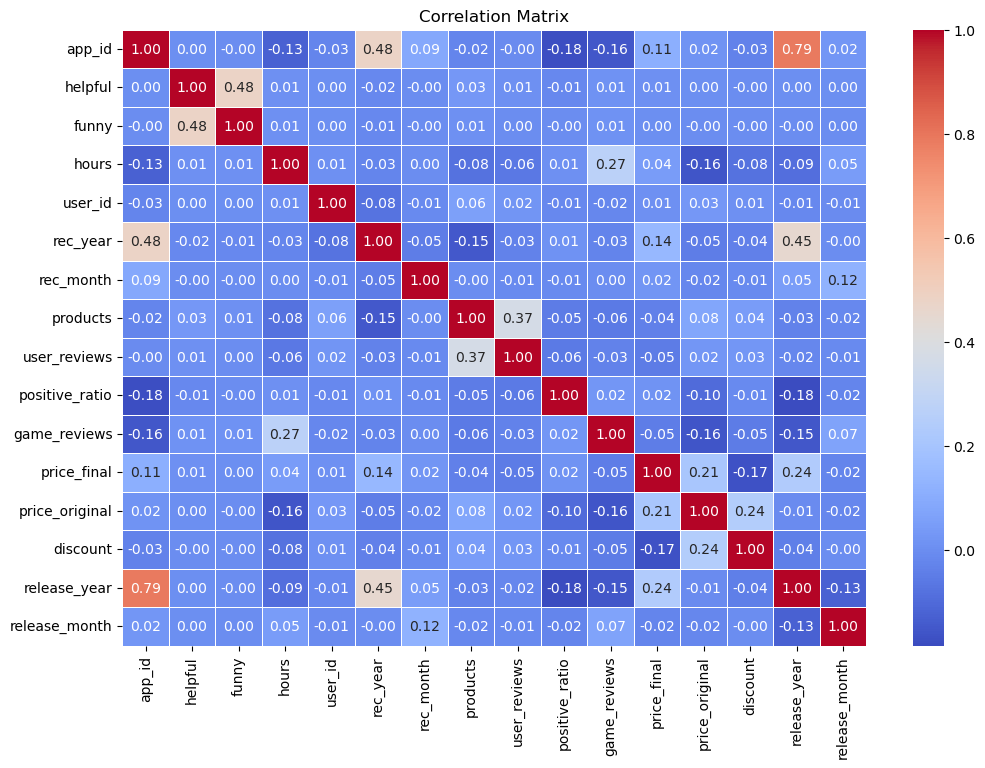

In [29]:
# Select only numeric columns
numeric_columns = merged_with_games.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Create random sample for further analyses and save df to csv file

In [30]:
# Take a random sample of 100,000 rows for analysis
sample_df = merged_with_games.sample(n=100000, random_state=42)

#Save sample_df
sample_df.to_csv('sample_df.csv', index=False)